# Runtime Analysis

## Setup

In [1]:
import timeit
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from generators.lecuyer import Lecuyer
from generators.mersenne_twister import MersenneTwister
from generators.tausworthe import Tausworthe

seed = 0xdeadbeef

# Init generators
lecuyer = Lecuyer(seed)
mersenne = MersenneTwister(seed)
tausworthe = Tausworthe(r=8, q=35, l=32, seed=seed)

## Timing Repetitions

In [2]:
def time_generator(gen_func, N, M):
  trials = timeit.repeat(stmt='gen_func()', number=N, repeat=M, globals={'gen_func': gen_func})
  min_trial = min(trials)
  return min_trial * 1000, min_trial * 1000 / N

In [3]:
N = 10000
M = 5

time_lecuyer = time_generator(lecuyer.next, N, M)
time_mersenne = time_generator(mersenne.next, N, M)
time_tausworthe = time_generator(tausworthe.next, N, M)


In [4]:
results = pd.DataFrame([
  ('Tausworthe', *time_tausworthe),
  ('L\'Ecuyer', *time_lecuyer),
  ('Mersenne Twister', *time_mersenne)],
  columns=['RNG', 'Total Time (ms)', 'Avg Time (ms)'])
results
print(results.to_markdown(index=False))

| RNG              |   Total Time (ms) |   Avg Time (ms) |
|:-----------------|------------------:|----------------:|
| Tausworthe       |           99.7062 |      0.00997062 |
| L'Ecuyer         |            9.0461 |      0.00090461 |
| Mersenne Twister |           13.2578 |      0.00132578 |


In [5]:
N2 = 5000
times = np.zeros((3, N2+1))
times[0,0] = time.perf_counter()
for i in range(N2):
  tausworthe.next()
  times[0, i+1] = time.perf_counter()

times[1,0] = time.perf_counter()
for i in range(N2):
  lecuyer.next()
  times[1, i+1] = time.perf_counter()

times[2,0] = time.perf_counter()
for i in range(N2):
  mersenne.next()
  times[2, i+1] = time.perf_counter()

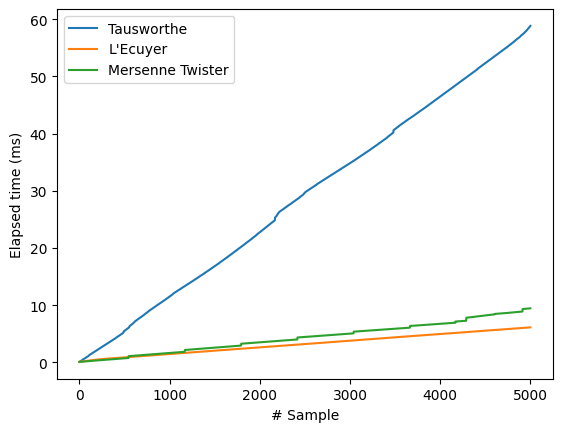

In [6]:
cumul_times = np.cumsum(np.diff(times), axis=1) * 1000
plt.plot(range(1, N2+1), cumul_times[0], label="Tausworthe")
plt.plot(range(1, N2+1), cumul_times[1], label="L'Ecuyer")
plt.plot(range(1, N2+1), cumul_times[2], label="Mersenne Twister")
plt.xlabel("# Sample")
plt.ylabel("Elapsed time (ms)")
plt.legend()
